<a href="https://colab.research.google.com/github/Aslam117/Iris-Dataset/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [68]:
#create a model class that inherits nn.module
class Model(nn.Module):
  #input layer (4 features of the flower) --> hodden layer1 (numbers of neuron)-->H2(neurons) -->output (3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9 ,out_features=3):
    super().__init__() #instamtiate  our nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x



In [69]:
# Pick a maanual seed forr randomization
torch.manual_seed(32)
# Create an instances of modeel
model=Model()

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)



In [72]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [73]:
# Change Last colum from stringws to integers
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [74]:
# Train Test split set x,y
X=my_df.drop('variety',axis=1)
y= my_df['variety']


In [75]:
#convert these t numpy arrays
X=X.values
y=y.values

In [76]:
# start trainiig
from sklearn.model_selection import train_test_split

In [77]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)




In [78]:
# convert x features to floast tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)


In [79]:
# convert y labels to tensors long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [80]:
# set  the criteria of model to measure the error ,,how far off the predictions from the  data
criteria =nn.CrossEntropyLoss()
# chose an optimizer , lr=learning rate(if error  does ot go down after a bunch of itterations(epochs),lower our learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)



In [81]:
#train model
# Epochs? (one run  through all the training data inn our network)
epoch=200
losses =[]
for i in range(epoch):
  # Go forward and get a predicition
  y_pred=model.forward(X_train) # Get predicted results
  # measure the loss/error ,gonna be high at first
  loss=criteria(y_pred,y_train) # predicted values vs the y_train value

  # keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch

  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')

  # Do some back propagation :take the error rate  of forward propagation and feed it bacck through the network to fine tune weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()







Epoch:0 and loss:1.1699321269989014
Epoch:10 and loss:0.9570867419242859
Epoch:20 and loss:0.7980871796607971
Epoch:30 and loss:0.6327950358390808
Epoch:40 and loss:0.43861737847328186
Epoch:50 and loss:0.290453165769577
Epoch:60 and loss:0.17780695855617523
Epoch:70 and loss:0.11584118008613586
Epoch:80 and loss:0.0893637090921402
Epoch:90 and loss:0.07752915471792221
Epoch:100 and loss:0.07132721692323685
Epoch:110 and loss:0.06751003116369247
Epoch:120 and loss:0.06487806886434555
Epoch:130 and loss:0.06290554255247116
Epoch:140 and loss:0.06134176254272461
Epoch:150 and loss:0.06004921719431877
Epoch:160 and loss:0.05894488841295242
Epoch:170 and loss:0.05797586962580681
Epoch:180 and loss:0.05710809305310249
Epoch:190 and loss:0.056319523602724075


Text(0.5, 0, 'Epoch')

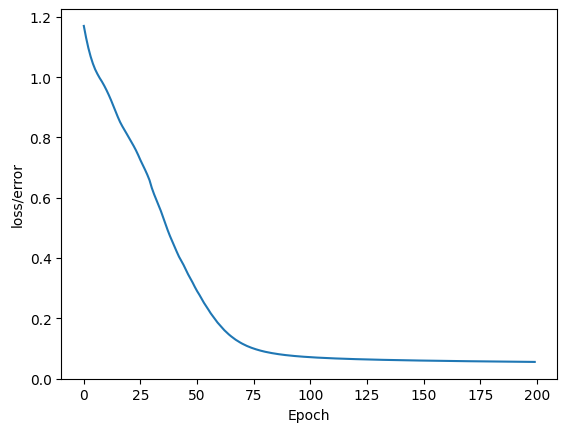

In [82]:
#Graph it out
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")


In [83]:
#evaluate model on test data set (validate model on test set)
with torch.no_grad(): #Basically turn of back ppropagation
  y_eval=model.forward(X_test) #  X_test are features from our test  set,y_evaall will be prediction
  loss = criteria(y_eval,y_test) # Find the loss or eror



In [84]:
loss

tensor(0.0299)

In [85]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x="Versicolor"
    else:
      x="Virginica"



    # will tell us what type of flower our network thinks it is
    print(f'{i+1} {str(y_val)} \t {x} \t {y_val.argmax().item()}')
     #correct or not
    if y_val.argmax().item()== y_test[i]:
      correct+=1
print(f'we got  {correct} correct')


1 tensor([-4.5524,  5.6405,  0.6237]) 	 Versicolor 	 1
2 tensor([  9.7448,   1.9934, -14.3814]) 	 Setosa 	 0
3 tensor([  8.7416,   2.2311, -13.2962]) 	 Setosa 	 0
4 tensor([-4.7794,  5.9376,  0.5870]) 	 Versicolor 	 1
5 tensor([-9.7729,  3.8656,  7.0612]) 	 Virginica 	 2
6 tensor([-10.4390,   5.0079,   6.8309]) 	 Virginica 	 2
7 tensor([  8.1509,   2.4743, -12.7041]) 	 Setosa 	 0
8 tensor([  8.9019,   2.1207, -13.4058]) 	 Setosa 	 0
9 tensor([-4.0269,  5.9741, -0.2109]) 	 Versicolor 	 1
10 tensor([  9.4659,   2.0771, -14.0952]) 	 Setosa 	 0
11 tensor([-4.9579,  6.4008,  0.5456]) 	 Versicolor 	 1
12 tensor([-11.6250,   2.6125,   9.6069]) 	 Virginica 	 2
13 tensor([-2.2279,  5.4664, -1.5515]) 	 Versicolor 	 1
14 tensor([-1.4655,  6.1635, -2.9018]) 	 Versicolor 	 1
15 tensor([-9.9333,  3.6219,  7.2932]) 	 Virginica 	 2
16 tensor([-11.2019,   2.2201,   9.4538]) 	 Virginica 	 2
17 tensor([-5.2356,  5.1262,  1.6068]) 	 Versicolor 	 1
18 tensor([-8.7358,  4.0160,  5.8771]) 	 Virginica 	 2
19 

In [88]:
# sending new images through thee network
new_iris=torch.tensor([4.7,3.2,1.3,0.2])


In [90]:
with torch.no_grad():
  print(model(new_iris))

tensor([  9.2131,   1.8691, -13.5858])
